In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
from utils import *

import pandas as pd
from markov_models.experiments import exp1

from building_availability_matrices.utils import (
    NO_CLIENTS,
    CORR,
    UNCORR,
    CORR_FT,
    UNCORR_FT,
)

In [2]:
# Number of FL training rounds:
n_rounds = 100

# Common carbon budget
global_carbon_budget = 7 # kgCO2e

# Uniform carbon budget
carbon_budget = 1 # kgCO2eq

# list of countries/clients:
countries = [i+1 for i in range(7)]

main_folder = 'availability_matrices/av-mat-3'

formatted_array = [i for i in range(n_rounds)]

In [3]:
res = exp1(t=20, T=100,_eps=0.25)

In [4]:
# Correlated case

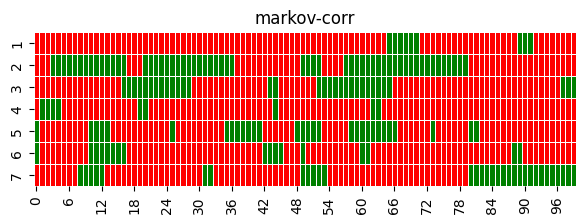

In [5]:
res_corr = res[CORR]
folder = main_folder
key_word = 'markov-corr'

availability_matrix = pd.DataFrame(res_corr, index = countries, columns = formatted_array)

plot_availability_heatmap("", availability_matrix, key_word, folder=folder)
availability_matrix.to_csv(folder+'/av-mat_'+key_word+'.csv', columns=formatted_array)

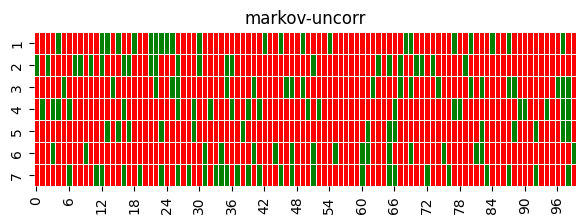

In [6]:
res_corr = res[UNCORR]
folder = main_folder
key_word = 'markov-uncorr'

availability_matrix = pd.DataFrame(res_corr, index = countries, columns = formatted_array)

plot_availability_heatmap("", availability_matrix, key_word, folder=folder)
availability_matrix.to_csv(folder+'/av-mat_'+key_word+'.csv', columns=formatted_array)

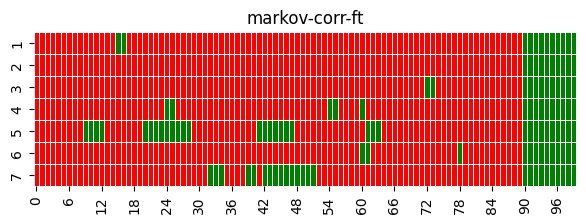

In [7]:
res_corr = res[CORR_FT]
folder = main_folder
key_word = 'markov-corr-ft'

availability_matrix = pd.DataFrame(res_corr, index = countries, columns = formatted_array)

plot_availability_heatmap("", availability_matrix, key_word, folder=folder)
availability_matrix.to_csv(folder+'/av-mat_'+key_word+'.csv', columns=formatted_array)

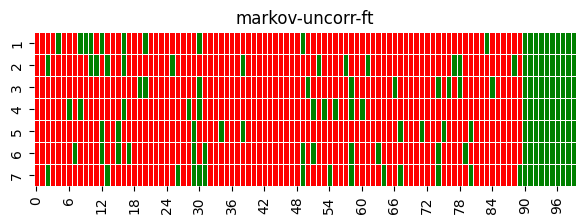

In [8]:
res_corr = res[UNCORR_FT]
folder = main_folder
key_word = 'markov-uncorr-ft'

availability_matrix = pd.DataFrame(res_corr, index = countries, columns = formatted_array)

plot_availability_heatmap("", availability_matrix, key_word, folder=folder)
availability_matrix.to_csv(folder+'/av-mat_'+key_word+'.csv', columns=formatted_array)